In [1]:
#Import dependants
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Data Reading, Merging, & Cleanup

---

## Begin with reading in CSVs. Then work on finding the best ways to merge data then do a final cleanup of columns needed for analysis

In [2]:
#Create Paths & Read CSVs
CSV1Kpath = Path("Kaggle1DS.csv")
CSV2Kpath = Path("Kaggle2DS.csv")
CSV3Xpath = Path("SHD.csv")
CSV1KR = pd.read_csv(CSV1Kpath)
CSV2KR = pd.read_csv(CSV2Kpath)
CSV3XR = pd.read_csv(CSV3Xpath)

In [3]:
#Inspect the the first CSV2KR
CSV2KR

,uid,nces_school_id,school,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.60,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.00,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.00,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.00,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,386,421899007517,E. Washington Rhodes Elementary School,4218990.0,Philadelphia City Sd,5/8/2023,2022-2023,2023,11:30 AM,Monday,...,40.002800,-75.178100,41.37,KG,8,403,Philadelphia County,42,42101,11.0
383,387,110003000008,Roosevelt High School,1100030.0,District Of Columbia Public Schools,5/17/2023,2022-2023,2023,2:25 PM,Wednesday,...,38.942971,-77.029177,67.90,9,12,392,District Of Columbia,11,11001,11.0
384,390,00600937,St. John's Prep,NaN,NaN,5/22/2023,2022-2023,2023,NaN,Monday,...,42.582682,-70.952603,176.30,6,12,NaN,Essex County,25,25009,21.0
385,389,421917006047,Oliver Citywide Academy,4219170.0,Pittsburgh Sd,5/24/2023,2022-2023,2023,7:30 AM,Wednesday,...,40.464327,-80.024121,22.63,3,12,88,Allegheny County,42,42003,11.0


In [4]:
#Take a look at column in CSV1KR
CSV1KR

#rename lat & lon for merge
renamed_CSV1 = CSV1KR.rename(columns={"LONCOD": "long", "LATCOD": "lat"})
renamed_CSV1

,long,lat,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
0,-75.584900,39.668100,1000.0,2009,William Penn High School,New Castle,Delaware,713 E Basin Rd,suburbtown,BLACK,0,1,1,8-Jan-09,High School,1.000230e+11,8:30PM
1,-87.617500,41.839900,1701.0,2009,Dunbar Vocational Career Academy,Chicago,Illinois,3000 S King Dr,urban,BLACK,0,5,5,9-Jan-09,High School,1.709930e+11,8:00PM
2,-90.165100,38.565700,1712.0,2009,Cahokia High School,Cahokia,Illinois,800 Range Ln,suburbtown,BLACK,1,0,1,23-Jan-09,High School,1.708040e+11,7:20PM
3,-78.311800,35.831500,3713.0,2009,Zebulon Middle School,Zebulon,North Carolina,Halifax Road and New Oak Street,suburbtown,BLACK,0,1,1,11-Feb-09,Middle School,3.704720e+11,6:00AM
4,-83.113977,42.383593,NaN,2009,Central High School,Detroit,Michigan,2425 Tuxedo St,urban,NaN,0,1,1,17-Feb-09,High School,2.601103e+11,2:20PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-149.881113,61.213281,200.0,2018,Denali Elementary School,Anchorage,Alaska,952 Cordova St,urban,WHITE,0,1,1,3-Oct-18,Elementary School,2.001800e+10,9:30AM
176,-77.378427,37.471892,5104.0,2018,Varina High School,Henrico,Virginia,7053 Messer Rd,rural,BLACK,0,1,1,7-Oct-18,High School,5.101890e+11,9:30PM
177,-80.691593,35.120282,3709.0,2018,Butler High School,Matthews,North Carolina,1810 Matthews Mint Hill Rd,suburbtown,WHITE,1,0,1,29-Oct-18,High School,3.702970e+11,7:15AM
178,-76.382449,36.826811,5103.0,2018,Simonsdale Elementary School,Portsmouth,Virginia,4841 Clifford St,urban,WHITE,0,1,1,20-Nov-18,Elementary School,5.103000e+11,4:00PM


In [5]:
#Merge DataFrame Kaggle Dataframes
Merge_1 = pd.merge(renamed_CSV1, CSV2KR, on=(["school", "lat", "long", "state"]), how='right')
Merge_1



,long,lat,CDCODE,year_x,school,city_x,state,address,urbanrural,race,...,weapon,weapon_source,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,-105.075000,39.603910,NaN,NaN,Columbine High School,NaN,Colorado,NaN,NaN,NaN,...,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,89.60,9,12,41,Jefferson County,8,8059,21.0
1,-91.169966,30.529958,NaN,NaN,Scotlandville Middle School,NaN,Louisiana,NaN,NaN,NaN,...,.22 caliber pistol,NaN,39.00,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,-84.047960,33.626922,NaN,NaN,Heritage High School,NaN,Georgia,NaN,NaN,NaN,...,".22 caliber rifle, 357-caliber Magnum handgun",NaN,84.00,9,12,125,Rockdale County,13,13247,21.0
3,-75.234108,39.921509,NaN,NaN,John Bartram High School,NaN,Pennsylvania,NaN,NaN,NaN,...,RG .25-caliber pistol,purchased from friend,41.00,9,12,2007,Philadelphia County,42,42101,11.0
4,-71.075901,42.285268,NaN,NaN,Dorchester High School,NaN,Massachusetts,NaN,NaN,NaN,...,NaN,NaN,NaN,9,12,543,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,-75.178100,40.002800,NaN,NaN,E. Washington Rhodes Elementary School,NaN,Pennsylvania,NaN,NaN,NaN,...,NaN,NaN,41.37,KG,8,403,Philadelphia County,42,42101,11.0
383,-77.029177,38.942971,NaN,NaN,Roosevelt High School,NaN,District of Columbia,NaN,NaN,NaN,...,NaN,NaN,67.90,9,12,392,District Of Columbia,11,11001,11.0
384,-70.952603,42.582682,NaN,NaN,St. John's Prep,NaN,Massachusetts,NaN,NaN,NaN,...,NaN,NaN,176.30,6,12,NaN,Essex County,25,25009,21.0
385,-80.024121,40.464327,NaN,NaN,Oliver Citywide Academy,NaN,Pennsylvania,NaN,NaN,NaN,...,NaN,NaN,22.63,3,12,88,Allegheny County,42,42003,11.0


In [6]:
#Check first merge columns
Merge_1.columns

Index(['long', 'lat', 'CDCODE', 'year_x', 'school', 'city_x', 'state',
       'address', 'urbanrural', 'race', 'killed_x', 'injured_x', 'victims',
       'date_x', 'type', 'NCESSCH', 'time_x', 'uid', 'nces_school_id',
       'nces_district_id', 'district_name', 'date_y', 'school_year', 'year_y',
       'time_y', 'day_of_week', 'city_y', 'school_type', 'enrollment',
       'killed_y', 'injured_y', 'casualties', 'shooting_type', 'age_shooter1',
       'gender_shooter1', 'race_ethnicity_shooter1', 'shooter_relationship1',
       'shooter_deceased1', 'deceased_notes1', 'age_shooter2',
       'gender_shooter2', 'race_ethnicity_shooter2', 'shooter_relationship2',
       'shooter_deceased2', 'deceased_notes2', 'white', 'black', 'hispanic',
       'asian', 'american_indian_alaska_native',
       'hawaiian_native_pacific_islander', 'two_or_more', 'resource_officer',
       'weapon', 'weapon_source', 'staffing', 'low_grade', 'high_grade',
       'lunch', 'county', 'state_fips', 'county_fips', 'u

In [7]:
#Final Merge1 cleanup
#Display columns and pick which columns to keep bring into a final dataframe 


#Select specific columns from previous data frame
selected_columns = ['uid','lat', 'long', 'year_y', 'date_y', 'school', 'city_y', 'state', 'address', 'urbanrural', 'race', 'killed_y', 'injured_y', 'victims', 'type', 'time_y', 
                    'district_name', 'school_year', 'day_of_week', 'school_type', 'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1', 'race_ethnicity_shooter1', 
                    'shooter_relationship1', 'shooter_deceased1', 'deceased_notes1', 'age_shooter2', 'gender_shooter2', 'race_ethnicity_shooter2', 'shooter_relationship2',
                    'shooter_deceased2', 'deceased_notes2','weapon', 'weapon_source']

Final_Merge1 = Merge_1[selected_columns].copy()
Final_Merge1


,uid,lat,long,year_y,date_y,school,city_y,state,address,urbanrural,...,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,weapon,weapon_source
0,1,39.603910,-105.075000,1999,4/20/1999,Columbine High School,Littleton,Colorado,NaN,NaN,...,1.0,suicide,17.0,m,w,student,1.0,suicide,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends
1,2,30.529958,-91.169966,1999,4/22/1999,Scotlandville Middle School,Baton Rouge,Louisiana,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.22 caliber pistol,NaN
2,3,33.626922,-84.047960,1999,5/20/1999,Heritage High School,Conyers,Georgia,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,".22 caliber rifle, 357-caliber Magnum handgun",NaN
3,4,39.921509,-75.234108,1999,10/4/1999,John Bartram High School,Philadelphia,Pennsylvania,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RG .25-caliber pistol,purchased from friend
4,5,42.285268,-71.075901,1999,11/3/1999,Dorchester High School,Boston,Massachusetts,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,386,40.002800,-75.178100,2023,5/8/2023,E. Washington Rhodes Elementary School,Philadelphia,Pennsylvania,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,387,38.942971,-77.029177,2023,5/17/2023,Roosevelt High School,Washington,District of Columbia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,390,42.582682,-70.952603,2023,5/22/2023,St. John's Prep,Danvers,Massachusetts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,389,40.464327,-80.024121,2023,5/24/2023,Oliver Citywide Academy,Pittsburgh,Pennsylvania,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#column cleanup to match final csv
revised_Merge1 = Final_Merge1.rename(columns={"date_y": "Date", "year_y": "Year", "city_y": "City", "state": "State"})



In [9]:
#change date format to match final csv
revised_Merge1['Date'] = pd.to_datetime(revised_Merge1['Date'], format='%m/%d/%Y')
#convert
revised_Merge1['Date'] = revised_Merge1['Date'].dt.strftime('%Y-%m-%d')

revised_Merge1

,uid,lat,long,Year,Date,school,City,State,address,urbanrural,...,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,weapon,weapon_source
0,1,39.603910,-105.075000,1999,1999-04-20,Columbine High School,Littleton,Colorado,NaN,NaN,...,1.0,suicide,17.0,m,w,student,1.0,suicide,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends
1,2,30.529958,-91.169966,1999,1999-04-22,Scotlandville Middle School,Baton Rouge,Louisiana,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.22 caliber pistol,NaN
2,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,".22 caliber rifle, 357-caliber Magnum handgun",NaN
3,4,39.921509,-75.234108,1999,1999-10-04,John Bartram High School,Philadelphia,Pennsylvania,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RG .25-caliber pistol,purchased from friend
4,5,42.285268,-71.075901,1999,1999-11-03,Dorchester High School,Boston,Massachusetts,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,386,40.002800,-75.178100,2023,2023-05-08,E. Washington Rhodes Elementary School,Philadelphia,Pennsylvania,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,387,38.942971,-77.029177,2023,2023-05-17,Roosevelt High School,Washington,District of Columbia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,390,42.582682,-70.952603,2023,2023-05-22,St. John's Prep,Danvers,Massachusetts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,389,40.464327,-80.024121,2023,2023-05-24,Oliver Citywide Academy,Pittsburgh,Pennsylvania,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Conduct final merge
#right merge
#final_data_merge_right = pd.merge(revised_Merge1, CSV3XR, on=(['school', 'Date', "State"]), how='right')
#final_data_merge_right

In [11]:
#Conduct final merge
#inner merge
final_data_merge = pd.merge(revised_Merge1, CSV3XR, on=('school'))
final_data_merge

,uid,lat,long,Year,Date_x,school,City_x,State_x,address,urbanrural,...,State_y,School_Level,Location,During_School,Time_Period,First_Shot,Bullied,Domestic_Violence,Gang_Related,Preplanned
0,1,39.603910,-105.075000,1999,1999-04-20,Columbine High School,Littleton,Colorado,NaN,NaN,...,CO,High,Cafeteria,Yes,Morning Classes,11:19 AM,Yes,No,No,Yes
1,2,30.529958,-91.169966,1999,1999-04-22,Scotlandville Middle School,Baton Rouge,Louisiana,NaN,NaN,...,LA,Middle,Beside Building,Yes,Lunch,12:30 PM,No,No,No,No
2,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,NaN,...,GA,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
3,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,NaN,...,VA,High,Hallway,Yes,Lunch,11:40:00,No,No,NaN,No
4,293,37.006300,-76.427200,2021,2021-09-20,Heritage High School,Newport News,Virginia,NaN,NaN,...,GA,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,366,39.668622,-75.584879,2023,2023-01-10,William Penn High School,New Castle,Delaware,NaN,NaN,...,DE,High,Gym,No,Sport Event,8:30 PM,No,No,No,No
482,367,40.655508,-111.936978,2023,2023-01-26,Taylorsville High School,Taylorsville,Utah,NaN,NaN,...,UT,High,Hallway,Yes,Afternoon Classes,NaN,No,No,No,No
483,377,35.228498,-101.824434,2023,2023-03-06,Palo Duro High School,Amarillo,Texas,NaN,NaN,...,TX,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
484,381,33.661200,-85.820000,2023,2023-03-22,Anniston High School,Anniston,Alabama,NaN,NaN,...,FL,High,Parking Lot,Yes,Before School,7:25 AM,No,No,No,No


In [12]:
#Drop additional columns that aren't needed
final_data_merge = final_data_merge.drop(['State_y','City_y', 'address', 'race', 'age_shooter2', 'gender_shooter2',
                                          'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
                                          'deceased_notes2', 'killed_y', 'Incident_ID', 'type', 'time_y'], axis=1)

final_data_merge

,uid,lat,long,Year,Date_x,school,City_x,State_x,urbanrural,injured_y,...,Quarter,School_Level,Location,During_School,Time_Period,First_Shot,Bullied,Domestic_Violence,Gang_Related,Preplanned
0,1,39.603910,-105.075000,1999,1999-04-20,Columbine High School,Littleton,Colorado,NaN,21,...,Spring,High,Cafeteria,Yes,Morning Classes,11:19 AM,Yes,No,No,Yes
1,2,30.529958,-91.169966,1999,1999-04-22,Scotlandville Middle School,Baton Rouge,Louisiana,NaN,1,...,Spring,Middle,Beside Building,Yes,Lunch,12:30 PM,No,No,No,No
2,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,6,...,Spring,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
3,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,6,...,Fall,High,Hallway,Yes,Lunch,11:40:00,No,No,NaN,No
4,293,37.006300,-76.427200,2021,2021-09-20,Heritage High School,Newport News,Virginia,NaN,2,...,Spring,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,366,39.668622,-75.584879,2023,2023-01-10,William Penn High School,New Castle,Delaware,NaN,0,...,Winter,High,Gym,No,Sport Event,8:30 PM,No,No,No,No
482,367,40.655508,-111.936978,2023,2023-01-26,Taylorsville High School,Taylorsville,Utah,NaN,0,...,Fall,High,Hallway,Yes,Afternoon Classes,NaN,No,No,No,No
483,377,35.228498,-101.824434,2023,2023-03-06,Palo Duro High School,Amarillo,Texas,NaN,1,...,Fall,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
484,381,33.661200,-85.820000,2023,2023-03-22,Anniston High School,Anniston,Alabama,NaN,1,...,Spring,High,Parking Lot,Yes,Before School,7:25 AM,No,No,No,No


In [13]:
final_data_merge.columns

Index(['uid', 'lat', 'long', 'Year', 'Date_x', 'school', 'City_x', 'State_x',
       'urbanrural', 'injured_y', 'victims', 'district_name', 'school_year',
       'day_of_week', 'school_type', 'casualties', 'shooting_type',
       'age_shooter1', 'gender_shooter1', 'race_ethnicity_shooter1',
       'shooter_relationship1', 'shooter_deceased1', 'deceased_notes1',
       'weapon', 'weapon_source', 'Date_y', 'Quarter', 'School_Level',
       'Location', 'During_School', 'Time_Period', 'First_Shot', 'Bullied',
       'Domestic_Violence', 'Gang_Related', 'Preplanned'],
      dtype='object')

In [14]:
#Final rename of columns   
renamed_finaldata = final_data_merge.rename(columns={"uid": "ID", "lat": "Lat", "long": "Lon", "Date_x": "Date", "school": "School",
                                                     "City_x": "City", "State_x": "State", "injured_y": "Victims Injured", "victims": "# of Victims",
                                                     "casualties": "Victim Casualties", "district_name": "District Name",
                                                     "school_year": "School Year", "day_of_week": "Day of the Week", "school_type": "Public vs. Private",
                                                     "shooting_type": "Incident(Shooting) Type", "age_shooter1": "Shooter Age", "gender_shooter1": "Shooter Gender",
                                                     "race_ethnicity_shooter1": "Shooter Race(ethnicity)", "shooter_relationship1": "Shooter relation to incident",
                                                     "shooter_deceased1": "Shooter Deceased", "deceased_notes1": "Deceased Notes", "weapon_source": "Weapon Source",
                                                     "School_Level": "School Level", "Location": "Location of Shooting", "During_School": "During School",
                                                     "Time_Period": "Time Period of Incident", "First_Shot": "Time of First Shot", "Bullied": "History of bullying (Shooter)",
                                                     "Domestic_Violence": "History of Domestic Violence (Shooter)", "Gang_Related": "Gang Related" })

renamed_finaldata

,ID,Lat,Lon,Year,Date,School,City,State,urbanrural,Victims Injured,...,Quarter,School Level,Location of Shooting,During School,Time Period of Incident,Time of First Shot,History of bullying (Shooter),History of Domestic Violence (Shooter),Gang Related,Preplanned
0,1,39.603910,-105.075000,1999,1999-04-20,Columbine High School,Littleton,Colorado,NaN,21,...,Spring,High,Cafeteria,Yes,Morning Classes,11:19 AM,Yes,No,No,Yes
1,2,30.529958,-91.169966,1999,1999-04-22,Scotlandville Middle School,Baton Rouge,Louisiana,NaN,1,...,Spring,Middle,Beside Building,Yes,Lunch,12:30 PM,No,No,No,No
2,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,6,...,Spring,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
3,3,33.626922,-84.047960,1999,1999-05-20,Heritage High School,Conyers,Georgia,NaN,6,...,Fall,High,Hallway,Yes,Lunch,11:40:00,No,No,NaN,No
4,293,37.006300,-76.427200,2021,2021-09-20,Heritage High School,Newport News,Virginia,NaN,2,...,Spring,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,366,39.668622,-75.584879,2023,2023-01-10,William Penn High School,New Castle,Delaware,NaN,0,...,Winter,High,Gym,No,Sport Event,8:30 PM,No,No,No,No
482,367,40.655508,-111.936978,2023,2023-01-26,Taylorsville High School,Taylorsville,Utah,NaN,0,...,Fall,High,Hallway,Yes,Afternoon Classes,NaN,No,No,No,No
483,377,35.228498,-101.824434,2023,2023-03-06,Palo Duro High School,Amarillo,Texas,NaN,1,...,Fall,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
484,381,33.661200,-85.820000,2023,2023-03-22,Anniston High School,Anniston,Alabama,NaN,1,...,Spring,High,Parking Lot,Yes,Before School,7:25 AM,No,No,No,No


In [15]:
#Read new column names
renamed_finaldata.columns

Index(['ID', 'Lat', 'Lon', 'Year', 'Date', 'School', 'City', 'State',
       'urbanrural', 'Victims Injured', '# of Victims', 'District Name',
       'School Year', 'Day of the Week', 'Public vs. Private',
       'Victim Casualties', 'Incident(Shooting) Type', 'Shooter Age',
       'Shooter Gender', 'Shooter Race(ethnicity)',
       'Shooter relation to incident', 'Shooter Deceased', 'Deceased Notes',
       'weapon', 'Weapon Source', 'Date_y', 'Quarter', 'School Level',
       'Location of Shooting', 'During School', 'Time Period of Incident',
       'Time of First Shot', 'History of bullying (Shooter)',
       'History of Domestic Violence (Shooter)', 'Gang Related', 'Preplanned'],
      dtype='object')

In [16]:
#Reorganize column placement
Full_SchoolS_df = renamed_finaldata[['ID', 'Lat', 'Lon', 'School', 'City', 'State', 'Year', 'Date', 'Date_y', 'Quarter',
                                     'urbanrural', 'Victims Injured', '# of Victims', 'District Name', 'School Year', 'Day of the Week', 
                                     'Public vs. Private', 'Victim Casualties', 'Incident(Shooting) Type', 'Shooter Age', 'Shooter Gender', 
                                     'Shooter Race(ethnicity)', 'Shooter relation to incident', 'Shooter Deceased', 'Deceased Notes', 'weapon', 
                                     'Weapon Source', 'School Level', 'Location of Shooting', 'During School', 'Time Period of Incident', 
                                     'Time of First Shot', 'History of bullying (Shooter)', 'History of Domestic Violence (Shooter)', 'Gang Related', 'Preplanned']]

Full_SchoolS_df

,ID,Lat,Lon,School,City,State,Year,Date,Date_y,Quarter,...,Weapon Source,School Level,Location of Shooting,During School,Time Period of Incident,Time of First Shot,History of bullying (Shooter),History of Domestic Violence (Shooter),Gang Related,Preplanned
0,1,39.603910,-105.075000,Columbine High School,Littleton,Colorado,1999,1999-04-20,1999-04-20,Spring,...,purchased from friends,High,Cafeteria,Yes,Morning Classes,11:19 AM,Yes,No,No,Yes
1,2,30.529958,-91.169966,Scotlandville Middle School,Baton Rouge,Louisiana,1999,1999-04-22,1999-04-22,Spring,...,NaN,Middle,Beside Building,Yes,Lunch,12:30 PM,No,No,No,No
2,3,33.626922,-84.047960,Heritage High School,Conyers,Georgia,1999,1999-05-20,1999-05-20,Spring,...,NaN,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
3,3,33.626922,-84.047960,Heritage High School,Conyers,Georgia,1999,1999-05-20,2021-09-20,Fall,...,NaN,High,Hallway,Yes,Lunch,11:40:00,No,No,NaN,No
4,293,37.006300,-76.427200,Heritage High School,Newport News,Virginia,2021,2021-09-20,1999-05-20,Spring,...,NaN,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,366,39.668622,-75.584879,William Penn High School,New Castle,Delaware,2023,2023-01-10,2009-01-08,Winter,...,NaN,High,Gym,No,Sport Event,8:30 PM,No,No,No,No
482,367,40.655508,-111.936978,Taylorsville High School,Taylorsville,Utah,2023,2023-01-26,2001-10-12,Fall,...,NaN,High,Hallway,Yes,Afternoon Classes,NaN,No,No,No,No
483,377,35.228498,-101.824434,Palo Duro High School,Amarillo,Texas,2023,2023-03-06,1992-09-11,Fall,...,NaN,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
484,381,33.661200,-85.820000,Anniston High School,Anniston,Alabama,2023,2023-03-22,1982-04-30,Spring,...,NaN,High,Parking Lot,Yes,Before School,7:25 AM,No,No,No,No


In [17]:
# Drop duplicates of values that have the same date & school across rows
Full_SchoolS_df = Full_SchoolS_df.drop_duplicates(['School', 'Date'])

Full_SchoolS_df.head(50)

,ID,Lat,Lon,School,City,State,Year,Date,Date_y,Quarter,...,Weapon Source,School Level,Location of Shooting,During School,Time Period of Incident,Time of First Shot,History of bullying (Shooter),History of Domestic Violence (Shooter),Gang Related,Preplanned
0,1,39.603910,-105.075000,Columbine High School,Littleton,Colorado,1999,1999-04-20,1999-04-20,Spring,...,purchased from friends,High,Cafeteria,Yes,Morning Classes,11:19 AM,Yes,No,No,Yes
1,2,30.529958,-91.169966,Scotlandville Middle School,Baton Rouge,Louisiana,1999,1999-04-22,1999-04-22,Spring,...,NaN,Middle,Beside Building,Yes,Lunch,12:30 PM,No,No,No,No
2,3,33.626922,-84.047960,Heritage High School,Conyers,Georgia,1999,1999-05-20,1999-05-20,Spring,...,NaN,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
4,293,37.006300,-76.427200,Heritage High School,Newport News,Virginia,2021,2021-09-20,1999-05-20,Spring,...,NaN,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
6,4,39.921509,-75.234108,John Bartram High School,Philadelphia,Pennsylvania,1999,1999-10-04,1999-10-04,Fall,...,purchased from friend,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
7,5,42.285268,-71.075901,Dorchester High School,Boston,Massachusetts,1999,1999-11-03,1982-02-08,Winter,...,NaN,High,Inside School Building,Yes,Dismissal,1:45 PM,No,No,No,No
8,6,32.261547,-107.762986,Deming Middle School,Deming,New Mexico,1999,1999-11-19,1999-11-19,Fall,...,home,Middle,Outside on School Property,Yes,Lunch,12:45 PM,No,No,No,No
9,7,35.795556,-95.241921,Fort Gibson Middle School,Fort Gibson,Oklahoma,1999,1999-12-06,1999-12-06,Winter,...,father,Middle,Front of School,Yes,School Start,7:45 AM,No,No,No,No
10,8,28.273253,-82.687231,Ridgewood High School,New Port Richey,Florida,2000,2000-01-19,1978-04-28,Spring,...,stolen,High,Beside Building,No,School Event,10:30 PM,NaN,No,No,No
12,9,37.286387,-120.494808,Alicia Reyes Elementary School,Merced,California,2000,2000-01-26,2000-01-26,Winter,...,NaN,Elementary,Parking Lot,Yes,School Start,8:34 AM,Yes,No,No,No


In [18]:
#Set index by date (There are two date columns, trying to figure out which to use)
#Full_SchoolS_df = Full_SchoolS_df.set_index('Date_y')

#Sort index
#Full_SchoolS_df = Full_SchoolS_df.sort_index()

#Full_SchoolS_df

In [19]:
Full_SchoolS_df.columns

Index(['ID', 'Lat', 'Lon', 'School', 'City', 'State', 'Year', 'Date', 'Date_y',
       'Quarter', 'urbanrural', 'Victims Injured', '# of Victims',
       'District Name', 'School Year', 'Day of the Week', 'Public vs. Private',
       'Victim Casualties', 'Incident(Shooting) Type', 'Shooter Age',
       'Shooter Gender', 'Shooter Race(ethnicity)',
       'Shooter relation to incident', 'Shooter Deceased', 'Deceased Notes',
       'weapon', 'Weapon Source', 'School Level', 'Location of Shooting',
       'During School', 'Time Period of Incident', 'Time of First Shot',
       'History of bullying (Shooter)',
       'History of Domestic Violence (Shooter)', 'Gang Related', 'Preplanned'],
      dtype='object')

In [20]:
#Drop columns date_y due to inconsistencies in date with other data
Full_SchoolS_df_copy = Full_SchoolS_df.drop(['Date_y'],axis=1)
Full_SchoolS_df_copy

,ID,Lat,Lon,School,City,State,Year,Date,Quarter,urbanrural,...,Weapon Source,School Level,Location of Shooting,During School,Time Period of Incident,Time of First Shot,History of bullying (Shooter),History of Domestic Violence (Shooter),Gang Related,Preplanned
0,1,39.603910,-105.075000,Columbine High School,Littleton,Colorado,1999,1999-04-20,Spring,NaN,...,purchased from friends,High,Cafeteria,Yes,Morning Classes,11:19 AM,Yes,No,No,Yes
1,2,30.529958,-91.169966,Scotlandville Middle School,Baton Rouge,Louisiana,1999,1999-04-22,Spring,NaN,...,NaN,Middle,Beside Building,Yes,Lunch,12:30 PM,No,No,No,No
2,3,33.626922,-84.047960,Heritage High School,Conyers,Georgia,1999,1999-05-20,Spring,NaN,...,NaN,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
4,293,37.006300,-76.427200,Heritage High School,Newport News,Virginia,2021,2021-09-20,Spring,NaN,...,NaN,High,Hallway,Yes,Morning Classes,8:03 AM,No,No,No,Yes
6,4,39.921509,-75.234108,John Bartram High School,Philadelphia,Pennsylvania,1999,1999-10-04,Fall,NaN,...,purchased from friend,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,366,39.668622,-75.584879,William Penn High School,New Castle,Delaware,2023,2023-01-10,Spring,NaN,...,NaN,High,Cafeteria,Yes,NaN,NaN,No,Yes,No,No
482,367,40.655508,-111.936978,Taylorsville High School,Taylorsville,Utah,2023,2023-01-26,Fall,NaN,...,NaN,High,Hallway,Yes,Afternoon Classes,NaN,No,No,No,No
483,377,35.228498,-101.824434,Palo Duro High School,Amarillo,Texas,2023,2023-03-06,Fall,NaN,...,NaN,High,Hallway,Yes,Morning Classes,10:00 AM,No,No,No,No
484,381,33.661200,-85.820000,Anniston High School,Anniston,Alabama,2023,2023-03-22,Spring,NaN,...,NaN,High,Parking Lot,Yes,Before School,7:25 AM,No,No,No,No


# School Shooting Analysis

---

## Begin first plots of highest/lowest school shooting indcidences per state, monthly trends, seasonal patterns

In [25]:
#Do an annual analysis of # of incidents by year
Year_School_df = Full_SchoolS_df_copy.groupby('Year')

#Count of incidents per year
Count_year_incident = Year_School_df['Year'].count()

Count_year_incident

Year
1999     7
2000    10
2001    11
2002     5
2003    11
2004     6
2005    12
2006    14
2007     8
2008     5
2009     9
2010     9
2011     5
2012    11
2013    12
2014    13
2015     5
2016    10
2017    14
2018    27
2019    23
2020     8
2021    27
2022    20
2023    11
Name: Year, dtype: int64

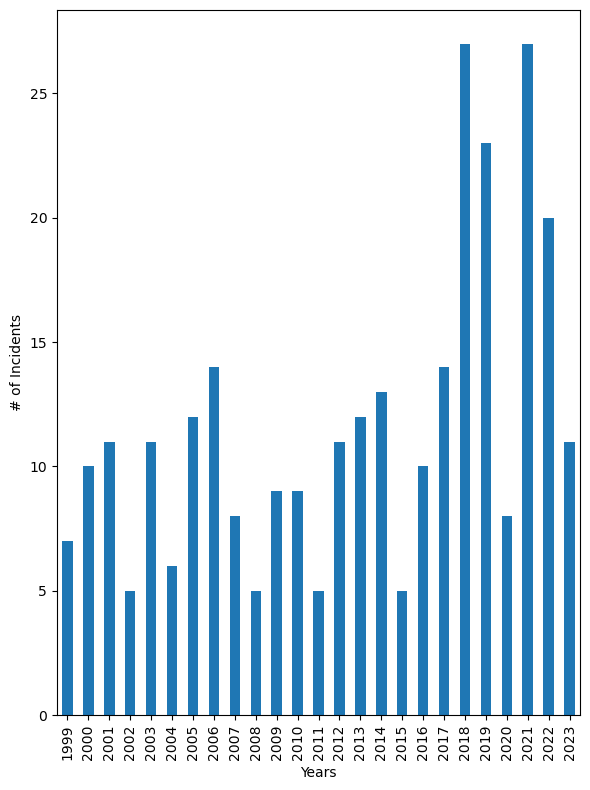

In [27]:
#Create a bar chart
annual_chart = Count_year_incident.plot(kind='bar', figsize=(6,8))

#Set xlabel & ylabel
annual_chart.set_xlabel("Years")
annual_chart.set_ylabel("# of Incidents")

plt.tight_layout()